# Data Analysis

**1.** Import the required libraries

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import pyodbc
import pandas as pd
import numpy as np
import nltk

In [95]:
user_name = 'soraia_alves'
api_key = 'upRwGvOoie777YLidnTM'

In [96]:
tls.set_credentials_file(user_name, api_key)

**2.** Connect with SQL database to import the data from the races that occured between 2015 e 2021

In [97]:
server = 'f1server.database.windows.net' 
database = 'WackyRacesF1' 
username = 'PDS' 
password = 'Formula1'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT DISTINCT raceId, year FROM dbo.races WHERE year >= 2015 AND year <= 2021;"
races = pd.read_sql(query, cnxn)
races.head()

,raceId,year
0,926,2015
1,927,2015
2,928,2015
3,929,2015
4,930,2015


## Who has been the dominant F1 team?

**3.** Connect with SQL database to import the data for the `"constructorResults"`

In [98]:
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'f1server.database.windows.net' 
database = 'WackyRacesF1' 
username = 'PDS' 
password = 'Formula1'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT * FROM dbo.constructorResults;"
constructorResults = pd.read_sql(query, cnxn)
constructorResults

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11965,16465,1075,213,4.0,\N
11966,16466,1075,210,2.0,\N
11967,16467,1075,51,0.0,\N
11968,16468,1075,117,0.0,\N


**4.** Connect with SQL database to import the data for the `"constructors"`

In [99]:
server = 'f1server.database.windows.net' 
database = 'WackyRacesF1' 
username = 'PDS' 
password = 'Formula1'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT * FROM dbo.constructors;"
constructors = pd.read_sql(query, cnxn)
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


**5.** Merge the data to obtain the constructor name

In [100]:
equipas_nome = constructorResults.merge(constructors[['constructorId', 'name']], how='left', on='constructorId')
equipas_nome

,constructorResultsId,raceId,constructorId,points,status,name
0,1,18,1,14.0,\N,McLaren
1,2,18,2,8.0,\N,BMW Sauber
2,3,18,3,9.0,\N,Williams
3,4,18,4,5.0,\N,Renault
4,5,18,5,2.0,\N,Toro Rosso
...,...,...,...,...,...,...
11965,16465,1075,213,4.0,\N,AlphaTauri
11966,16466,1075,210,2.0,\N,Haas F1 Team
11967,16467,1075,51,0.0,\N,Alfa Romeo
11968,16468,1075,117,0.0,\N,Aston Martin


**6.** Merge the data to obtain year

In [101]:
equipas_year = equipas_nome.merge(races, how='inner', on='raceId')
equipas_year

,constructorResultsId,raceId,constructorId,points,status,name,year
0,15015,926,131,43.0,\N,Mercedes,2015
1,15016,926,6,15.0,\N,Ferrari,2015
2,15017,926,3,12.0,\N,Williams,2015
3,15018,926,15,14.0,\N,Sauber,2015
4,15019,926,9,8.0,\N,Red Bull,2015
...,...,...,...,...,...,...,...
1429,16445,1073,214,6.0,\N,Alpine F1 Team,2021
1430,16446,1073,117,0.0,\N,Aston Martin,2021
1431,16447,1073,210,0.0,\N,Haas F1 Team,2021
1432,16448,1073,3,0.0,\N,Williams,2021


**7.** Keep only the required columns, while grouping the data by `"year"` and `"constructor name"`

In [102]:
equipas = equipas_year.groupby(['year','name'])['points'].sum().reset_index()
equipas

,year,name,points
0,2015,Ferrari,428.0
1,2015,Force India,136.0
2,2015,Lotus F1,78.0
3,2015,Manor Marussia,0.0
4,2015,Marussia,0.0
...,...,...,...
67,2021,Haas F1 Team,0.0
68,2021,McLaren,275.0
69,2021,Mercedes,613.5
70,2021,Red Bull,585.5


**8.** Create an interactive plot to show the `"Top Constructors per Year"`, using the *Plotly* library

In [103]:
fig1 = px.line(equipas, x="year", y="points", color="name", title=" Top Constructors per Year")
fig1.update_traces(mode="markers+lines", hovertemplate=None)
fig1.update_layout(hovermode="x")

fig1.layout.template = 'plotly_dark'
fig1.show()

In [104]:
#top_constructor = fig1
#py.plot(top_constructor, filename = 'top_constructor', auto_open = False)

## Who has been the dominant F1 driver?

**9.** Connect with SQL database and import the data for the `"driverStandings"`

In [105]:
server = 'f1server.database.windows.net' 
database = 'WackyRacesF1' 
username = 'PDS' 
password = 'Formula1'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT * FROM dbo.driverStandings;"
driverStandings = pd.read_sql(query, cnxn)
driverStandings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33450,71287,1075,849,0.0,20,20,0
33451,71288,1075,807,0.0,17,17,0
33452,71289,1075,815,12.0,7,7,0
33453,71290,1075,830,25.0,3,3,1


**10.** Connect with SQL database and inport the data for the `"drivers"`

In [106]:
server = 'f1server.database.windows.net' 
database = 'WackyRacesF1' 
username = 'PDS' 
password = 'Formula1'  
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
query = "SELECT * FROM dbo.drivers;"
drivers = pd.read_sql(query, cnxn)
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89.0,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9.0,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


**11.** Create a new column with the driver full name

In [107]:
drivers['driver_name'] = drivers['forename'] + ' ' + drivers['surname']
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driver_name
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen


**12.** Merge the data to obtain the driver name

In [108]:
driver_name = driverStandings.merge(drivers[['driverId', 'driver_name']], how='inner', on='driverId')
driver_name

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driver_name
0,1,18,1,10.0,1,1,1,Lewis Hamilton
1,9,19,1,14.0,1,1,1,Lewis Hamilton
2,27,20,1,14.0,3,3,1,Lewis Hamilton
3,48,21,1,20.0,2,2,1,Lewis Hamilton
4,69,22,1,28.0,3,3,1,Lewis Hamilton
...,...,...,...,...,...,...,...,...
33450,71187,87,40,3.0,21,21,0,Patrick Friesacher
33451,71214,88,40,3.0,21,21,0,Patrick Friesacher
33452,71241,89,40,3.0,21,21,0,Patrick Friesacher
33453,71261,1074,855,1.0,10,10,0,Guanyu Zhou


**13.** Merge the data to obtain the year of each race

In [109]:
driver_year = driver_name.merge(races, how='inner', on='raceId')
driver_year

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driver_name,year
0,67058,927,1,43.0,1,1,1,Lewis Hamilton,2015
1,67059,927,3,33.0,3,3,0,Nico Rosberg,2015
2,67077,927,4,0.0,20,20,0,Fernando Alonso,2015
3,67069,927,8,12.0,5,5,0,Kimi Räikkönen,2015
4,67068,927,18,0.0,16,16,0,Jenson Button,2015
...,...,...,...,...,...,...,...,...,...
2990,70753,1073,847,16.0,15,15,0,George Russell,2021
2991,70757,1073,849,7.0,17,17,0,Nicholas Latifi,2021
2992,70748,1073,852,32.0,14,14,0,Yuki Tsunoda,2021
2993,70755,1073,854,0.0,19,19,0,Mick Schumacher,2021


**14.** Filter the winning positions

In [110]:
pilotos_wins = driver_year[driver_year['position'] == 1]
pilotos_wins

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driver_name,year
0,67058,927,1,43.0,1,1,1,Lewis Hamilton,2015
21,67079,928,1,68.0,1,1,2,Lewis Hamilton,2015
42,67100,929,1,93.0,1,1,3,Lewis Hamilton,2015
63,67121,930,1,111.0,1,1,3,Lewis Hamilton,2015
84,67142,931,1,126.0,1,1,3,Lewis Hamilton,2015
...,...,...,...,...,...,...,...,...,...
2899,70657,1070,830,312.5,1,1,9,Max Verstappen,2021
2920,70678,1071,830,332.5,1,1,9,Max Verstappen,2021
2941,70699,1051,830,351.5,1,1,9,Max Verstappen,2021
2962,70720,1072,830,369.5,1,1,9,Max Verstappen,2021


**15.** Keep only the required columns, while grouping the data by `"year"` and `"driver_name"`

In [111]:
pilotos = pilotos_wins.groupby(['year','driver_name'])['position'].sum().reset_index()
pilotos

,year,driver_name,position
0,2015,Lewis Hamilton,19
1,2016,Lewis Hamilton,4
2,2016,Nico Rosberg,17
3,2017,Lewis Hamilton,8
4,2017,Sebastian Vettel,12
5,2018,Lewis Hamilton,15
6,2018,Sebastian Vettel,6
7,2019,Lewis Hamilton,18
8,2019,Valtteri Bottas,3
9,2020,Lewis Hamilton,15


**16.** Create an interactive plot to show the `"Top Drivers per Year"`, using the *Plotly* library

In [112]:
fig2 = px.histogram(pilotos_wins, x="wins", y="year", title='Top Drivers per Year',
             color='driver_name', barmode='group',
             histfunc='count',
             orientation = 'h')
fig2.layout.template = 'plotly_dark'

fig2.show()

In [113]:
#top_driver = fig2
#py.plot(top_driver, filename = 'top_driver', auto_open = False)

**17.** Import the other datasets, which were obtained by scrapping the data from the web

In [114]:
circuits = pd.read_excel('f1_circuits_2015_2021.xlsx')
circuits

,season,circuit_id,lat,long,country
0,2015,albert_park,-37.84970,144.96800,Australia
1,2015,sepang,2.76083,101.73800,Malaysia
2,2015,shanghai,31.33890,121.22000,China
3,2015,bahrain,26.03250,50.51060,Bahrain
4,2015,catalunya,41.57000,2.26111,Spain
...,...,...,...,...,...
114,2020,imola,44.34390,11.71670,Italy
115,2020,istanbul,40.95170,29.40500,Turkey
116,2020,bahrain,26.03250,50.51060,Bahrain
117,2020,bahrain,26.03250,50.51060,Bahrain


In [115]:
drivers = pd.read_excel('f1_drivers_2015_2021.xlsx')
drivers

,DRIVER_ID,DRIVER,DRIVER_REF,DRIVER_CODE,DOB,NATIONALITY
0,1,Lewis Hamilton,hamilton,HAM,1985-01-07,British
1,3,Nico Rosberg,rosberg,ROS,1985-06-27,German
2,4,Fernando Alonso,alonso,ALO,1981-07-29,Spanish
3,8,Kimi Raikkonen,raikkonen,RAI,1979-10-17,Finnish
4,9,Robert Kubica,kubica,KUB,1984-12-07,Polish
5,13,Felipe Massa,massa,MAS,1981-04-25,Brazilian
6,16,Adrian Sutil,sutil,SUT,1983-01-11,German
7,18,Jenson Button,button,BUT,1980-01-19,British
8,20,Sebastian Vettel,vettel,VET,1987-07-03,German
9,154,Romain Grosjean,grosjean,GRO,1986-04-17,French


In [116]:
races_1 = pd.read_excel('f1_race_data_2015_2021.xlsx')
races_1.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
CLASS,1,2,3,4,5
DRIVER,Lewis Hamilton,Max Verstappen,Valtteri Bottas,Lando Norris,Sergio Perez
TEAM,Mercedes-AMG Petronas F1 Team,Red Bull Racing Honda,Mercedes-AMG Petronas F1 Team,McLaren F1 Team,Red Bull Racing Honda
LAPS,56,56,56,56,56
RACE_TIME,1:32:03.897,1:32:04.642,1:32:41.280,1:32:50.363,1:32:55.944
DRIVER_SNAME,L. Hamilton,M. Verstappen,V. Bottas,L. Norris,S. Perez
GRAND_PRIX,bahrain,bahrain,bahrain,bahrain,bahrain
SEASON,2021,2021,2021,2021,2021
FLAP_POS,4.0,2.0,1.0,6.0,3.0


In [117]:
races_1.columns

Index(['Unnamed: 0', 'CLASS', 'DRIVER', 'TEAM', 'LAPS', 'RACE_TIME',
       'DRIVER_SNAME', 'GRAND_PRIX', 'SEASON', 'FLAP_POS', 'FLAP_TIME',
       'F_LAP', 'FLAP_GAP', 'FLAP_KM/H', 'FLAP_HOUR', 'BS1_POS', 'BS1_TIME',
       'BS2_POS', 'BS2_TIME', 'BS3_POS', 'BS3_TIME', 'ST_POS', 'ST_KM/H',
       'I1_POS', 'I1_KM/H', 'I2_POS', 'I2_KM/H', 'FL_POS', 'FL_KM/H',
       'DRIVER_NO', 'STOPS', 'PS_TOTAL_TIME', 'QL_CLASS', 'QL_TIME1',
       'QL_LAPS1', 'QL_TIME2', 'QL_LAPS2', 'QL_TIME3', 'QL_LAPS3', 'GD_CLASS',
       'GD_TIME', 'DRIVER_ID', 'NUMBER', 'RACE_ID', 'RACE_NAME', 'RACE',
       'STATUS_ID', 'DRIVER_STATUS', 'CIRCUIT_ID', 'CIRCUIT_REF'],
      dtype='object')

# Which is the fastest F1 track?

In [118]:
laps = races_1[['GRAND_PRIX', 'FLAP_KM/H', 'SEASON']]
laps

,GRAND_PRIX,FLAP_KM/H,SEASON
0,bahrain,207.235,2021
1,bahrain,208.984,2021
2,bahrain,211.566,2021
3,bahrain,206.398,2021
4,bahrain,207.334,2021
...,...,...,...
2935,abu-dhabi,189.079,2015
2936,abu-dhabi,190.793,2015
2937,abu-dhabi,182.414,2015
2938,abu-dhabi,179.784,2015


In [119]:
laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRAND_PRIX  2940 non-null   object 
 1   FLAP_KM/H   2696 non-null   float64
 2   SEASON      2940 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 69.0+ KB


In [120]:
laps['SEASON'] = laps['SEASON'].astype(int)

C:\Users\chezb\AppData\Local\Temp/ipykernel_23168/1455886873.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
fastest_lap = laps.groupby(['SEASON', 'GRAND_PRIX'])['FLAP_KM/H'].mean().reset_index()
fastest_lap

,SEASON,GRAND_PRIX,FLAP_KM/H
0,2015,abu-dhabi,187.770789
1,2015,australian,207.175692
2,2015,austrian,210.758529
3,2015,bahrain,197.316000
4,2015,belgian,219.946444
...,...,...,...
131,2021,russian,211.886600
132,2021,saudi-arabia,239.258900
133,2021,spanish,205.642050
134,2021,turkish,206.676100


In [122]:
fig3 = px.histogram(fastest_lap, x="GRAND_PRIX", y="FLAP_KM/H", animation_frame="SEASON", color='GRAND_PRIX')
fig3.layout.template = 'plotly_dark'

fig3.show()

In [123]:
#top_track = fig3
#py.plot(top_track, filename = 'top_track', auto_open = False)

# Addicted to safety cars!

In [124]:
races_1['DRIVER_STATUS'].value_counts()

Finished            1370
+1 Lap               785
+2 Laps              155
Collision            109
Engine                53
Accident              52
Brakes                45
Power Unit            30
Retired               29
Gearbox               28
Collision damage      27
Suspension            22
+3 Laps               19
Wheel                 14
Power loss            10
Hydraulics            10
Electronics            9
Electrical             9
Puncture               7
Fuel pressure          6
Spun off               6
+4 Laps                6
Overheating            6
Oil leak               6
Disqualified           6
Withdrew               5
Battery                5
Tyre                   4
Exhaust                4
Turbo                  3
Wheel nut              3
Mechanical             3
Water pressure         3
Transmission           3
Driveshaft             2
Damage                 2
ERS                    2
Throttle               2
Front wing             2
Oil pressure           1


In [125]:
dnf = races_1[['DRIVER', 'DRIVER_STATUS']]
dnf

,DRIVER,DRIVER_STATUS
0,Lewis Hamilton,Finished
1,Max Verstappen,Finished
2,Valtteri Bottas,Finished
3,Lando Norris,Finished
4,Sergio Perez,Finished
...,...,...
2935,Max Verstappen,+1 Lap
2936,Fernando Alonso,+2 Laps
2937,Will Stevens,+2 Laps
2938,Roberto Merhi,+3 Laps


In [126]:
dnf_total = dnf.groupby('DRIVER')['DRIVER_STATUS'].count().reset_index()
dnf_total

,DRIVER,DRIVER_STATUS
0,Alexander Albon,39
1,Alexander Rossi,5
2,Antonio Giovinazzi,63
3,Brendon Hartley,25
4,Carlos Sainz,142
5,Charles Leclerc,82
6,Daniel Ricciardo,142
7,Daniil Kvyat,94
8,Esteban Gutierrez,21
9,Esteban Ocon,92


In [127]:
dnf_total.rename(columns={'DRIVER_STATUS':'Total_races'}, inplace=True)
dnf_total.head()

,DRIVER,Total_races
0,Alexander Albon,39
1,Alexander Rossi,5
2,Antonio Giovinazzi,63
3,Brendon Hartley,25
4,Carlos Sainz,142


In [128]:
dnf = dnf[dnf['DRIVER_STATUS'] != 'Finished']
dnf

,DRIVER,DRIVER_STATUS
11,Antonio Giovinazzi,+1 Lap
12,Esteban Ocon,+1 Lap
13,George Russell,+1 Lap
14,Sebastian Vettel,+1 Lap
15,Mick Schumacher,+1 Lap
...,...,...
2935,Max Verstappen,+1 Lap
2936,Fernando Alonso,+2 Laps
2937,Will Stevens,+2 Laps
2938,Roberto Merhi,+3 Laps


In [129]:
more_dnf = dnf.groupby('DRIVER')['DRIVER_STATUS'].count().reset_index().sort_values(by='DRIVER_STATUS', ascending=False)
more_dnf

,DRIVER,DRIVER_STATUS
36,Romain Grosjean,80
16,Kevin Magnussen,77
12,Fernando Alonso,70
21,Marcus Ericsson,70
4,Carlos Sainz,70
18,Lance Stroll,68
7,Daniil Kvyat,66
25,Nico Hulkenberg,65
17,Kimi Raikkonen,61
39,Sergio Perez,59


In [130]:
more_dnf.rename(columns={'DRIVER_STATUS':'Total_DNF'}, inplace=True)
more_dnf.head()

,DRIVER,Total_DNF
36,Romain Grosjean,80
16,Kevin Magnussen,77
12,Fernando Alonso,70
21,Marcus Ericsson,70
4,Carlos Sainz,70


In [131]:
dnf_ratio = more_dnf.merge(dnf_total, how='inner', on='DRIVER')
dnf_ratio

,DRIVER,Total_DNF,Total_races
0,Romain Grosjean,80,118
1,Kevin Magnussen,77,101
2,Fernando Alonso,70,100
3,Marcus Ericsson,70,81
4,Carlos Sainz,70,142
5,Lance Stroll,68,102
6,Daniil Kvyat,66,94
7,Nico Hulkenberg,65,104
8,Kimi Raikkonen,61,140
9,Sergio Perez,59,138


In [132]:
drivers = ['Romain Grosjean', 'Kevin Magnusses', 'Fernando Alonso', 'Carlos Sainz', 'Lance Stroll', 'Daniil Kvyat', 'Nico Hulkenberg', 'Kimi Raikkonen', 'Sergio Perez', 'Daniel Ricciardo', 'Esteban Ocon', 'George Russell', 'Antonio Giovinazzi', 'Pierre Gasly', 'Max Verstappen', 'Sebastian Vettel', 'Charles Leclerc', 'Valtteri Bottas', 'Nicholas Latifi', 'Lando Norris', 'Mick Schumacher', 'Nikita Mazepin', 'Robert Kubica', 'Yuki Tsunoda', 'Alexander Albon', 'Lewis Hamilton', 'Nico Rosberg']

dnf_ratio = dnf_ratio[dnf_ratio['DRIVER'].isin(drivers)]
dnf_ratio

,DRIVER,Total_DNF,Total_races
0,Romain Grosjean,80,118
2,Fernando Alonso,70,100
4,Carlos Sainz,70,142
5,Lance Stroll,68,102
6,Daniil Kvyat,66,94
7,Nico Hulkenberg,65,104
8,Kimi Raikkonen,61,140
9,Sergio Perez,59,138
10,Daniel Ricciardo,52,142
11,Esteban Ocon,50,92


In [133]:
dnf_ratio['dnf_ratio'] = dnf_ratio['Total_DNF']/dnf_ratio['Total_races']*100
dnf_ratio = dnf_ratio.sort_values(by='dnf_ratio', ascending=False)
dnf_ratio

C:\Users\chezb\AppData\Local\Temp/ipykernel_23168/662863158.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DRIVER,Total_DNF,Total_races,dnf_ratio
29,Nikita Mazepin,19,21,90.476190
28,Mick Schumacher,19,22,86.363636
32,Robert Kubica,18,21,85.714286
12,George Russell,48,61,78.688525
6,Daniil Kvyat,66,94,70.212766
2,Fernando Alonso,70,100,70.000000
13,Antonio Giovinazzi,43,63,68.253968
34,Yuki Tsunoda,15,22,68.181818
0,Romain Grosjean,80,118,67.796610
5,Lance Stroll,68,102,66.666667


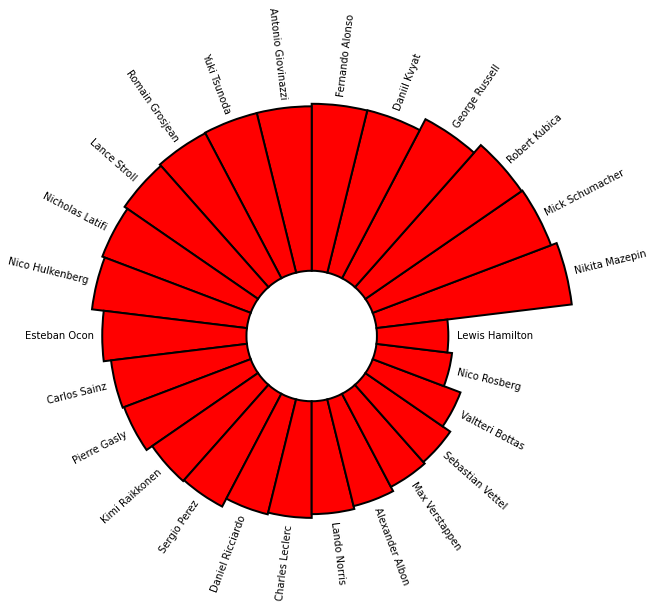

In [134]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = dnf_ratio['dnf_ratio'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * dnf_ratio['dnf_ratio'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(dnf_ratio.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(dnf_ratio.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color="red",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, dnf_ratio["DRIVER"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
        
# Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment,
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

# Too soon to celebrate!

In [135]:
races_1

,Unnamed: 0,CLASS,DRIVER,TEAM,LAPS,RACE_TIME,DRIVER_SNAME,GRAND_PRIX,SEASON,FLAP_POS,...,GD_TIME,DRIVER_ID,NUMBER,RACE_ID,RACE_NAME,RACE,STATUS_ID,DRIVER_STATUS,CIRCUIT_ID,CIRCUIT_REF
0,0,1,Lewis Hamilton,Mercedes-AMG Petronas F1 Team,56,1:32:03.897,L. Hamilton,bahrain,2021,4.0,...,1:29.385,1.0,44.0,1052.0,Bahrain Grand Prix,Bahrain,1.0,Finished,3.0,bahrain
1,1,2,Max Verstappen,Red Bull Racing Honda,56,1:32:04.642,M. Verstappen,bahrain,2021,2.0,...,1:28.997,830.0,33.0,1052.0,Bahrain Grand Prix,Bahrain,1.0,Finished,3.0,bahrain
2,2,3,Valtteri Bottas,Mercedes-AMG Petronas F1 Team,56,1:32:41.280,V. Bottas,bahrain,2021,1.0,...,1:29.586,822.0,77.0,1052.0,Bahrain Grand Prix,Bahrain,1.0,Finished,3.0,bahrain
3,3,4,Lando Norris,McLaren F1 Team,56,1:32:50.363,L. Norris,bahrain,2021,6.0,...,1:29.974,846.0,4.0,1052.0,Bahrain Grand Prix,Bahrain,1.0,Finished,3.0,bahrain
4,4,5,Sergio Perez,Red Bull Racing Honda,56,1:32:55.944,S. Perez,bahrain,2021,3.0,...,1:30.659,815.0,11.0,1052.0,Bahrain Grand Prix,Bahrain,1.0,Finished,3.0,bahrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,16,Max Verstappen,Scuderia Toro Rosso,54,1:39:09.064,M. Verstappen,abu-dhabi,2015,6.0,...,1:42.521,830.0,33.0,945.0,Abu Dhabi Grand Prix,Abu Dhabi,11.0,+1 Lap,24.0,yas_marina
2936,2936,17,Fernando Alonso,McLaren Honda,53,1:39:17.721,F. Alonso,abu-dhabi,2015,3.0,...,1:43.187,4.0,14.0,945.0,Abu Dhabi Grand Prix,Abu Dhabi,12.0,+2 Laps,24.0,yas_marina
2937,2937,18,Will Stevens,Manor Marussia F1 Team,53,1:39:54.204,W. Stevens,abu-dhabi,2015,18.0,...,1:46.297,829.0,28.0,945.0,Abu Dhabi Grand Prix,Abu Dhabi,12.0,+2 Laps,24.0,yas_marina
2938,2938,19,Roberto Merhi,Manor Marussia F1 Team,52,1:39:11.622,R. Merhi,abu-dhabi,2015,19.0,...,NaN,833.0,98.0,945.0,Abu Dhabi Grand Prix,Abu Dhabi,13.0,+3 Laps,24.0,yas_marina


In [136]:
pole_win = races_1[['QL_CLASS', 'GD_CLASS']]
pole_win

,QL_CLASS,GD_CLASS
0,2.0,2
1,1.0,1
2,3.0,3
3,7.0,7
4,11.0,11
...,...,...
2935,11.0,11
2936,17.0,16
2937,19.0,19
2938,20.0,NaN


In [137]:
pole_win = pole_win[pole_win['GD_CLASS']!='PIT']

In [138]:
pole_win['GD_CLASS'] = pole_win['GD_CLASS'].astype(float)

C:\Users\chezb\AppData\Local\Temp/ipykernel_23168/3054242958.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
pole_win

,QL_CLASS,GD_CLASS
0,2.0,2.0
1,1.0,1.0
2,3.0,3.0
3,7.0,7.0
4,11.0,11.0
...,...,...
2935,11.0,11.0
2936,17.0,16.0
2937,19.0,19.0
2938,20.0,NaN


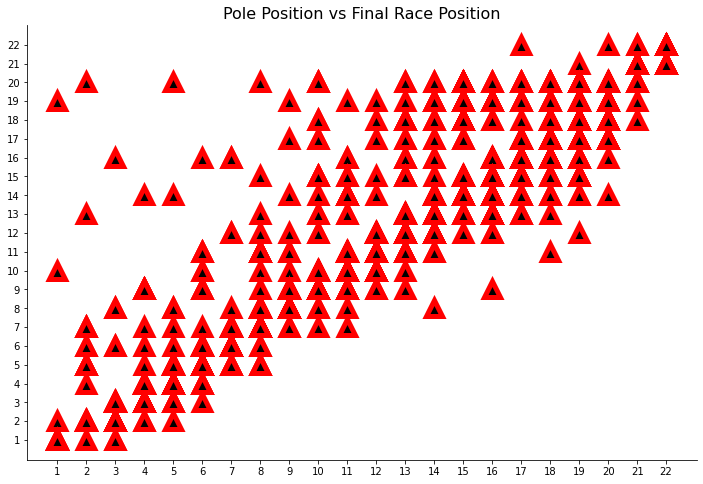

In [140]:
plt.figure(figsize=(12,8))
ax = plt.subplot(111)
x= pole_win['QL_CLASS']
y= pole_win['GD_CLASS']
plt.plot('QL_CLASS', 'GD_CLASS', data=pole_win, linestyle='none', marker='^', markersize=16, markerfacecolor='black', markeredgecolor="red", markeredgewidth=5)
plt.xticks(np.arange(1,23,1))
plt.yticks(np.arange(1,23,1))
plt.title('Pole Position vs Final Race Position', fontsize= 16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

# @F1

In [141]:
tweets = pd.read_csv('F1_tweets.csv')
tweets.head()

C:\Users\chezb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Zack Shephard,NaN,My opinions are mine ALONE. Venting is the onl...,2011-12-03 20:36:55,89.0,2598,212886,False,2021-08-01 23:59:18,The next great #F1 duo!!! @ESPNF1 https://t.co...,['F1'],Twitter for iPhone,False
1,Matteo Vannucci,NaN,"Free speech, free ideas, random thoughts",2010-05-28 01:02:32,10.0,40,8,False,2021-08-01 23:59:10,@F1 What if…Hamilton would have gone to the pi...,"['HungarianGP', 'F1']",Twitter for iPhone,False
2,Michelle,The Burbs,"likes- movies, candy, being lazy, formula 1, ...",2009-03-04 16:53:13,231.0,110,428,False,2021-08-01 23:58:48,This has been a tiring #f1 day... https://t.co...,['f1'],Twitter for Android,False
3,JoshWFC 🇧🇷,NaN,| JP10’s biggest fan | pronouns : João/Pedro |...,2021-04-05 16:14:53,156.0,443,2994,False,2021-08-01 23:58:11,Valteri Bottass tracking down Max Verstappen o...,['F1'],Twitter for iPhone,False
4,Ria Tagulinao,MNL,Fun-sized Filipina writer @Medium,2009-06-22 16:08:51,833.0,379,30891,False,2021-08-01 23:57:40,No words to describe the #HungarianGP so I wil...,"['HungarianGP', 'F1']",Twitter for iPhone,False


In [142]:
tweets_text = tweets['text']
tweets_text.head()

0    The next great #F1 duo!!! @ESPNF1 https://t.co...
1    @F1 What if…Hamilton would have gone to the pi...
2    This has been a tiring #f1 day... https://t.co...
3    Valteri Bottass tracking down Max Verstappen o...
4    No words to describe the #HungarianGP so I wil...
Name: text, dtype: object

In [145]:
results = ""
for i, tweet in enumerate(tweets_text):
    results += tweet

KeyboardInterrupt: 

In [ ]:
results